# Data Analysis of Hungarian speakers on the comprehension of English polysemous words

Done by Sonia Horvathova 2074445

## Importing and Installing libraries and functions

In [87]:
!python --version

Python 3.9.18


In [102]:
#Installing important libraries
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn
!pip install scipy
!pip install numpy
#C:\path\to\python.exe -m pip install --upgrade pip

#Importing functions and libraries as shortcuts
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.utils.class_weight import compute_sample_weight


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Loading

In [373]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\Polysemy data_final\Polysemy_data.csv")
#Checking if everything works as intended
#print (df.head())

## Data Cleaning and Preparation

In [374]:
#Grouping up columns that will be dropped from the dataset
#Columns not part of the survey or polysemous test
columns_to_remove = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 
                     'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage']

#Removing unnecessary data from the experiment/surbey
columns_to_remove_experiment = ['Q17_6_TEXT', 'Q20_8_TEXT', 'QID2_First Click', 'QID2_Last Click', 'QID2_Page Submit', 'QID2_Click Count', 'Example A', 'Example B','Time_Last Click', 'Time_Page Submit', 'Time_Click Count',
                                  'Time_Last Click.1','Time_Page Submit.1', 'Time_Click Count.1','Time_Last Click.2', 'Time_Page Submit.2', 'Time_Click Count.2', 'Time_Last Click.3', 
                                  'Time_Page Submit.3', 'Time_Click Count.3', 'Time_Last Click.4','Time_Page Submit.4', 'Time_Click Count.4','Time_Last Click.5', 'Time_Page Submit.5',
                                  'Time_Click Count.5', 'Time_Last Click.6', 'Time_Page Submit.6', 'Time_Click Count.6', 'Time_Last Click.7','Time_Page Submit.7', 'Time_Click Count.7',
                                  'Time_Last Click.8', 'Time_Page Submit.8', 'Time_Click Count.8', 'Time_Last Click.9', 'Time_Page Submit.9', 'Time_Click Count.9', 'Time_Last Click.10',
                                  'Time_Page Submit.10', 'Time_Click Count.10', 'Time_Last Click.11', 'Time_Page Submit.11', 'Time_Click Count.11','Time_Last Click.12', 'Time_Page Submit.12',
                                  'Time_Click Count.12','Time_Last Click.13', 'Time_Page Submit.13', 'Time_Click Count.13', 'Time_Last Click.14', 'Time_Page Submit.14', 'Time_Click Count.14',
                                  'Time_Last Click.15', 'Time_Page Submit.15', 'Time_Click Count.15', 'Time_Last Click.16', 'Time_Page Submit.16', 'Time_Click Count.16','Time_Last Click.17',
                                  'Time_Page Submit.17', 'Time_Click Count.17','Time_Last Click.18','Time_Page Submit.18', 'Time_Click Count.18', 'Time_Last Click.19', 'Time_Page Submit.19',
                                  'Time_Click Count.19', 'Time_Last Click.20', 'Time_Page Submit.20', 'Time_Click Count.20','Time_Last Click.21', 'Time_Page Submit.21', 'Time_Click Count.21',
                                  'Time_Last Click.22', 'Time_Page Submit.22', 'Time_Click Count.22', 'Time_Last Click.23', 'Time_Page Submit.23', 'Time_Click Count.23','Time_Last Click.24',
                                  'Time_Page Submit.24', 'Time_Click Count.24','Time_Last Click.25', 'Time_Page Submit.25', 'Time_Click Count.25', 'Time_Last Click.26', 'Time_Page Submit.26',
                                  'Time_Click Count.26', 'Time_Last Click.27', 'Time_Page Submit.27', 'Time_Click Count.27', 'Time_Last Click.28', 'Time_Page Submit.28', 'Time_Click Count.28',
                                  'Time_Last Click.29', 'Time_Page Submit.29', 'Time_Click Count.29','Q97'
                                 ]


In [375]:
#Removing first set of columns (background)
df_cleaned = df.drop(columns=columns_to_remove)
#print (df_cleaned.head())

#Removing second set of columns (experiment)
df_fully_cleaned = df_cleaned.drop(columns=columns_to_remove_experiment)
#print (df_fully_cleaned.head())

#Listing of all columns names for better access
#columns_list = df.columns.tolist()
#print(columns_list)

#Removing rows with missing data
final_data = df_fully_cleaned.dropna()

#Droping first two rows as they contain irrelevant data
data = final_data.iloc[2:].reset_index(drop=True)

#print(data)

### Renaming columns

In [376]:
#Renaming columns for clarity
column_mapping = {
    'Q24': 'Statement of Consent',
    'Q14': 'Gender',
    'Q15': 'Age',
    'Q17': 'Education_Level',
    'Q16': 'English_Proficiency',
    'Q19': 'Language_Use_Frequency',
    'Q20': 'Language_Use_Context',
}

data.rename(columns=column_mapping, inplace=True)
#Printing data to confirm the changes
#print(data)

#Initially used for assigning categories

category_mappings = {

    'Gender': {1: 'Male', 2: 'Female', 3: 'Other'},
    'Education_Level': {
        1: 'High school',
        2: 'College',
        3: "Bachelor's degree",
        4: "Master's degree",
        5: 'Doctorate',
        6: 'Other',
    },
    'English_Proficiency": {
        1: 'Beginner (A1-A2)',
        2: 'Intermediate (B1-B2)',
        3: 'Advanced (C1)',
        4: 'Fluent/Proficient (C2)',
    },
    'Language_Use_Frequency': {
        1: 'Daily',
        2: '4-6 times a week',
        3: '2-3 times a week',
        4: 'Once a week',
        5: 'Once a month',
        6: 'Rarely',
        7: 'Never',
    },
}

In [377]:
#Creating a mapping for timer columns based on their stimulus column
renaming = {}

#Iterating through columns and checking the stimulus type in the next column
for i, col in enumerate(data.columns):
    if "Time_First Click" in col:
        if i + 1 < len(data.columns):
            next_col = data.columns[i + 1]
            if "Polysemous" in next_col:
                renaming[col] = f"timer_polysemy_{len(renaming) + 1}"
            elif "Monosemic" in next_col:
                renaming[col] = f"timer_monosemic_{len(renaming) + 1}"

# Renaming the columns in the dataset
data.rename(columns=renaming, inplace=True)

# Display renamed columns to confirm changes
#print(data.columns)

In [378]:
#Checking for correct renaming
#columns_list = data.columns.tolist()
#print(columns_list)

#Checking data due to error (missing values)
#print(data["Polysemous.2"])

### Data Simplification

In [358]:
#Counting the options selected by individuals for use context
def count_contexts(list_):
    if pd.isna(list_):
        return 0
    return len(str(list_).split(','))

#Adding a new column for the count
data['Use_context_count'] = data['Language_Use_Context'].apply(count_contexts)

#Confirming the changes in dataset
data[['Language_Use_Context', 'Use_context_count']].head()


,Language_Use_Context,Use_context_count
0,"3,4,5,6,7",5
1,"1,3,4,5,6,7",6
2,"1,3,4,5,6,7",6
3,"2,4,5,6,7",5
4,"3,4,6,7",4


In [359]:
#Combining reaction times and accuracies for polysemous and monosemic stimuli into lists
#Looking for common text for the individual columns
polysemy_timers = [col for col in data.columns if "timer_polysemy" in col]
monosemy_timers = [col for col in data.columns if "timer_monosemic" in col]

polysemous = [col for col in data.columns if "Polysemous" in col]
monosemic = [col for col in data.columns if "Monosemic" in col]

#Assuring that all the data is numerical
data[polysemous] = data[polysemous].apply(pd.to_numeric, errors='coerce')
data[monosemic] = data[monosemic].apply(pd.to_numeric, errors='coerce')

data[polysemy_timers] = data[polysemy_timers].apply(pd.to_numeric, errors='coerce')
data[monosemy_timers] = data[monosemy_timers].apply(pd.to_numeric, errors='coerce')

#Calculating the mean accuracies and reaction times
data['Polysemous_Accuracy'] = data[polysemous].mean(axis=1)
data['Monosemic_Accuracy'] = data[monosemic].mean(axis=1)

data['Polysemous_RT'] = data[polysemy_timers].mean(axis=1)
data['Monosemic_RT'] = data[monosemy_timers].mean(axis=1)


### Data balancing

In [360]:
#Adding weights to imbalanced data
weights_ed = compute_sample_weight('balanced', data['Education_Level'])
weights_ep = compute_sample_weight('balanced', data['English_Proficiency'])
weights_lf = compute_sample_weight('balanced', data['Language_Use_Frequency'])
weights_uc = compute_sample_weight('balanced', data['Use_context_count'])

#combined_weights = (weights_ed + weights_ep + weights_ef + weights_ec) / 4
#print(weights_ed)

## Data analysis

### Accuraccies between polysemous and monosemic stimuli

In [361]:
#Calculating the accuracies for polysemous and monosemic columns
polysemous_accuracy = data[polysemous].mean()
monosemic_accuracy = data[monosemic].mean()

#Looking for the most accurate and most inaccurate polysemous and monosemic stimuli
most_accurate_polysemous = polysemous_accuracy.idxmax()
most_inaccurate_polysemous = polysemous_accuracy.idxmin()
most_accurate_monosemic = monosemic_accuracy.idxmax()
most_inaccurate_monosemic = monosemic_accuracy.idxmin()

#Getting the accuracy values for tho most and least accurate columns
most_accurate_polysemous_value = polysemous_accuracy.max()
most_inaccurate_polysemous_value = polysemous_accuracy.min()
most_accurate_monosemic_value = monosemic_accuracy.max()
most_inaccurate_monosemic_value = monosemic_accuracy.min()

#Printing the results
print("Accuracy for Polysemous stimuli:")
print(polysemous_accuracy)
print("Accuracy for Monosemic stimuli:")
print(monosemic_accuracy)

print(f"Most accurate Polysemous stimulus was {most_accurate_polysemous} with accuracy {most_accurate_polysemous_value}")
print(f"Most inaccurate Polysemous stimulus was {most_inaccurate_polysemous} with accuracy {most_inaccurate_polysemous_value}")
print(f"Most accurate Monosemic stimulus was {most_accurate_monosemic} with accuracy {most_accurate_monosemic_value}")
print(f"Most inaccurate Monosemic stimulus was {most_inaccurate_monosemic} with accuracy {most_inaccurate_monosemic_value}")

# Calculate overall average accuracy for Polysemous stimuli
overall_polysemous_avg = polysemous_accuracy.mean()

# Calculate overall average accuracy for Monosemic stimuli
overall_monosemic_avg = monosemic_accuracy.mean()

# Print the overall average accuracies
print(f"Overall average accuracy for Polysemous stimuli: {overall_polysemous_avg:.3f}")
print(f"Overall average accuracy for Monosemic stimuli: {overall_monosemic_avg:.3f}")


Accuracy for Polysemous stimuli:
Polysemous       0.771429
Polysemous.1     0.571429
Polysemous.2     0.942857
Polysemous.3     0.857143
Polysemous.4     0.571429
Polysemous.5     0.885714
Polysemous.6     0.657143
Polysemous.7     0.828571
Polysemous.8     0.685714
Polysemous.9     0.742857
Polysemous.10    0.371429
Polysemous.11    0.971429
Polysemous.12    0.542857
Polysemous.13    0.857143
Polysemous.14    0.914286
dtype: float64
Accuracy for Monosemic stimuli:
Monosemic       0.714286
Monosemic.1     0.828571
Monosemic.2     0.942857
Monosemic.3     1.000000
Monosemic.4     0.771429
Monosemic.5     0.914286
Monosemic.6     0.971429
Monosemic.7     0.600000
Monosemic.8     0.742857
Monosemic.9     1.000000
Monosemic.10    0.800000
Monosemic.11    0.857143
Monosemic.12    1.000000
Monosemic.13    1.000000
Monosemic.14    1.000000
dtype: float64
Most accurate Polysemous stimulus was Polysemous.11 with accuracy 0.9714285714285714
Most inaccurate Polysemous stimulus was Polysemous.10 w

## Linear Regression comparison of Polysemous and Monosemic Words (with a plot)

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.539
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0259
Time:                        18:50:14   Log-Likelihood:                 14.799
No. Observations:                  30   AIC:                            -25.60
Df Residuals:                      28   BIC:                            -22.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

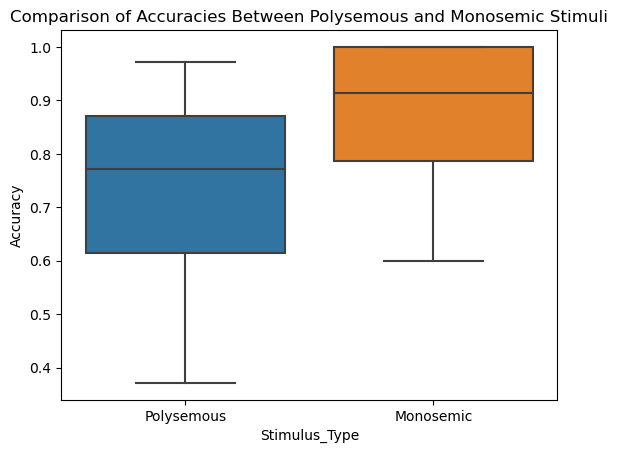

In [362]:
#Creating a DataFrame for polysemous and monosemic accuracies (accuracies calculated in the previous cell)
polysemous_df = pd.DataFrame({'Accuracy': polysemous_accuracy, 'Stimulus_Type': 'Polysemous'})
monosemic_df = pd.DataFrame({'Accuracy': monosemic_accuracy, 'Stimulus_Type': 'Monosemic'})

#Creating one DataFrame with both stimuli combined
accuracy_df = pd.concat([polysemous_df, monosemic_df]).reset_index(drop=True)

#Performing linear regression
model = smf.ols("Accuracy ~ Stimulus_Type", data=accuracy_df).fit()

#Printing summary of results (OLS Regression)
print(model.summary())

#Visualizing the results using boxplot
sns.boxplot(data=accuracy_df, x='Stimulus_Type', y='Accuracy')
plt.title("Comparison of Accuracies Between Polysemous and Monosemic Stimuli")
plt.show()


## Linear Regression Analysis

### Education Level

In [363]:
#Creating target variable list
target_variables = ['Polysemous_RT', 'Monosemic_RT', 'Polysemous_Accuracy', 'Monosemic_Accuracy']

#Iterating through targets and training the Linear Regression on Education Levels
for target in target_variables:
    #Assigning X(independent variable) and y(target variable)
    X_ed = data[['Education_Level']]
    y_ed = data[target]
    
    #Converting categorical data into dummy variables
    X_encoded_ed = pd.get_dummies(X_ed, drop_first=True)

    #Splitting the data into training and testing set
    X_train_ed, X_test_ed, y_train_ed, y_test_ed = train_test_split(X_encoded_ed, y_ed, test_size=0.2, random_state=42)
    
    #Adding constant to model
    X_train_const_ed = sm.add_constant(X_train_ed)
    X_test_const_ed = sm.add_constant(X_test_ed)
    
    #Adjusting the weights to trained data
    weights_train_ed = weights_ed[X_train_ed.index]
    
    #Fitting the linear regression model (WLS)
    model_ed = sm.WLS(y_train_ed, X_train_const_ed, weights=weights_train_ed).fit()

    #Printing the sumarries of the model (results)
    print(f"\n                   {target} and Education Levels")
    print(model_ed.summary())



                   Polysemous_RT and Education Levels
                            WLS Regression Results                            
Dep. Variable:          Polysemous_RT   R-squared:                       0.360
Model:                            WLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     4.492
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0122
Time:                        18:50:15   Log-Likelihood:                -71.380
No. Observations:                  28   AIC:                             150.8
Df Residuals:                      24   BIC:                             156.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### English Proficiency

In [364]:
#Creating target variable list
target_variables = ['Polysemous_RT', 'Monosemic_RT', 'Polysemous_Accuracy', 'Monosemic_Accuracy']

#Iterating through targets and training the Linear Regression on English Proficiency
for target in target_variables:
    #Assigning X(independent variable) and y(target variable)
    X_ep = data[['English_Proficiency']]
    y_ep = data[target]

    #Converting categorical data into dummy variables
    X_encoded_ep = pd.get_dummies(X_ep, drop_first=True) 

    #Splitting the data into training and testing set
    X_train_ep, X_test_ep, y_train_ep, y_test_ep = train_test_split(X_encoded_ep, y_ep, test_size=0.2, random_state=42)

    #Adding constant to model
    X_train_const_ep = sm.add_constant(X_train_ep)
    X_test_const_ep = sm.add_constant(X_test_ep)

    #Adjusting the weights to trained data
    weights_train_ep = weights_ep[X_train_ep.index]
    
    #Fitting the linear regression model (WLS)
    model_ep = sm.WLS(y_train_ep, X_train_const_ep, weights=weights_train_ep).fit()

    #Printing the sumarries of the model (results)
    print(f"\n                   {target} and English_Proficiency")
    print(model_ep.summary())



                   Polysemous_RT and English_Proficiency
                            WLS Regression Results                            
Dep. Variable:          Polysemous_RT   R-squared:                       0.265
Model:                            WLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     4.517
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0212
Time:                        18:50:15   Log-Likelihood:                -73.382
No. Observations:                  28   AIC:                             152.8
Df Residuals:                      25   BIC:                             156.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Language Use Frequency

In [365]:
#Creating target variable list    
target_variables = ['Polysemous_RT', 'Monosemic_RT', 'Polysemous_Accuracy', 'Monosemic_Accuracy']

#Iterating through targets and training the Linear Regression on Language Use Frequency
for target in target_variables:
    #Assigning X(independent variable) and y(target variable)
    X_lf = data[['Language_Use_Frequency']]
    y_lf = data[target]

    #Converting categorical data into dummy variables
    X_encoded_lf = pd.get_dummies(X_lf, drop_first=True)

    #Splitting the data into training and testing set
    X_train_lf, X_test_lf, y_train_lf, y_test_lf = train_test_split(X_encoded_lf, y_lf, test_size=0.2, random_state=42)

    #Adding constant to model
    X_train_const_lf = sm.add_constant(X_train_lf)
    X_test_const_lf = sm.add_constant(X_test_lf)

    #Adjusting the weights to trained data
    weights_train_lf = weights_lf[X_train_lf.index]
    
    #Fitting the linear regression model (WLS)
    model_lf = sm.WLS(y_train_lf, X_train_const_lf, weights=weights_train_lf).fit()

    #Printing the sumarries of the model (results)
    print(f"\n                   {target} and Language_Use_Frequency")
    print(model_lf.summary())



                   Polysemous_RT and Language_Use_Frequency
                            WLS Regression Results                            
Dep. Variable:          Polysemous_RT   R-squared:                       0.177
Model:                            WLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.695
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0871
Time:                        18:50:16   Log-Likelihood:                -80.251
No. Observations:                  28   AIC:                             166.5
Df Residuals:                      25   BIC:                             170.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

### Use context count

In [366]:
#Creating target variable list
target_variables = ['Polysemous_RT', 'Monosemic_RT', 'Polysemous_Accuracy', 'Monosemic_Accuracy']

#Iterating through targets and training the Linear Regression on Use context count
for target in target_variables:
    #Assigning X(independent variable) and y(target variable)
    X_uc = data[['Use_context_count']]
    y_uc = data[target]

    #Converting categorical data into dummy variables
    X_encoded_uc = pd.get_dummies(X_uc, drop_first=True)
    
    #Splitting the data into training and testing set
    X_train_uc, X_test_uc, y_train_uc, y_test_uc = train_test_split(X_encoded_uc, y_uc, test_size=0.2, random_state=42)

    #Adding constant to model
    X_train_const_uc = sm.add_constant(X_train_uc)
    X_test_const_uc = sm.add_constant(X_test_uc)

    #Adjusting the weights to trained data
    weights_train_uc = weights_uc[X_train_uc.index]
    
    #Fitting the linear regression model (WLS)
    model_uc = sm.WLS(y_train_uc, X_train_const_uc, weights=weights_train_uc).fit()

    #Printing the sumarries of the model (results)
    print(f"\n                   {target} and Use_context_count")
    print(model_uc.summary())



                   Polysemous_RT and Use_context_count
                            WLS Regression Results                            
Dep. Variable:          Polysemous_RT   R-squared:                       0.138
Model:                            WLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4.155
Date:                Fri, 10 Jan 2025   Prob (F-statistic):             0.0518
Time:                        18:50:16   Log-Likelihood:                -77.243
No. Observations:                  28   AIC:                             158.5
Df Residuals:                      26   BIC:                             161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Mixed-effect Model

### Education (Random effects)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.214105
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2705: RuntimeWarning: invalid va


                 Polysemous_RT and English_Proficiency
                                 Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                Polysemous_RT
No. Observations:                35                     Method:                            REML         
No. Groups:                      3                      Scale:                             13.2712      
Min. group size:                 11                     Log-Likelihood:                    -89.0989     
Max. group size:                 12                     Converged:                         No           
Mean group size:                 11.7                                                                   
--------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



                 Monosemic_RT and English_Proficiency
                                  Mixed Linear Model Regression Results
Model:                             MixedLM                Dependent Variable:                Monosemic_RT
No. Observations:                  35                     Method:                            REML        
No. Groups:                        3                      Scale:                             10.7596     
Min. group size:                   11                     Log-Likelihood:                    -85.2569    
Max. group size:                   12                     Converged:                         Yes         
Mean group size:                   11.7                                                                  
---------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.822799
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the esti


                 Polysemous_Accuracy and English_Proficiency
                                 Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              Polysemous_Accuracy
No. Observations:              35                   Method:                          REML               
No. Groups:                    3                    Scale:                           0.0241             
Min. group size:               11                   Log-Likelihood:                  9.2011             
Max. group size:               12                   Converged:                       No                 
Mean group size:               11.7                                                                     
--------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------

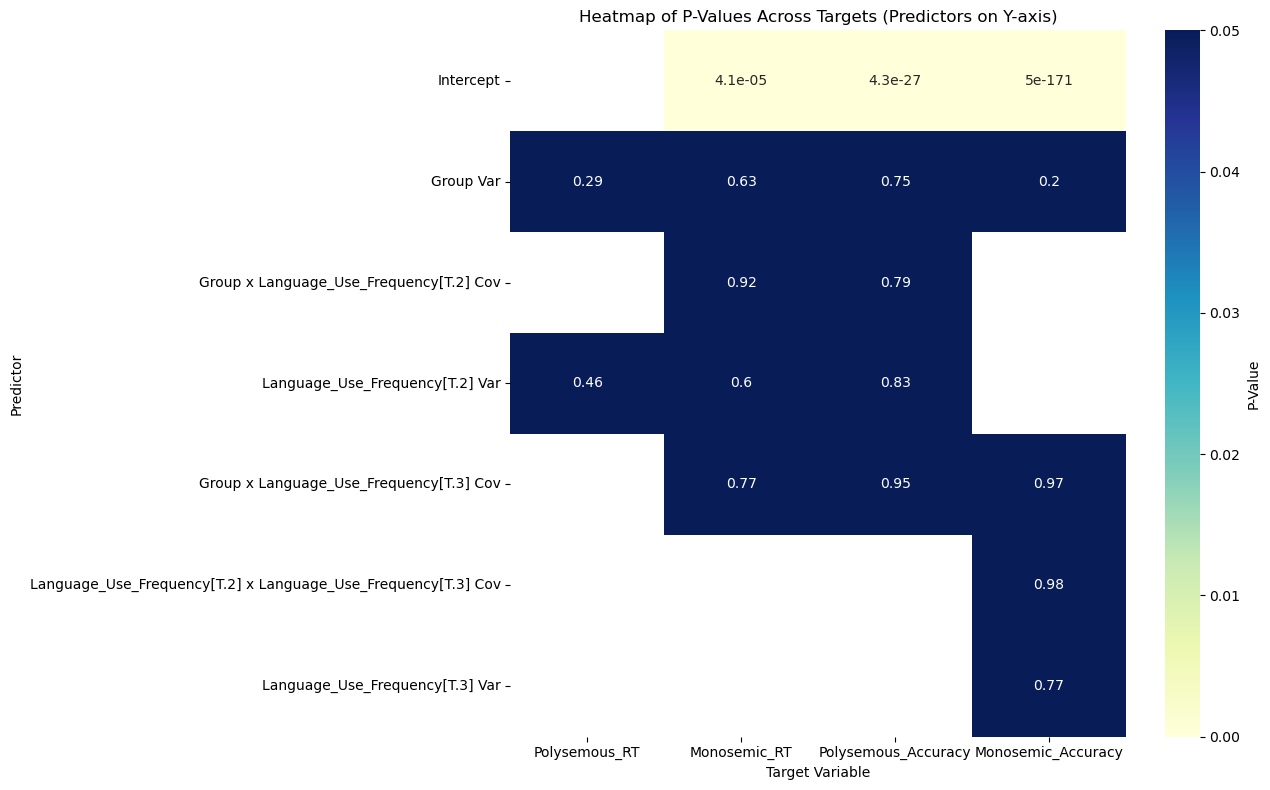

In [367]:
#Creating empty lists for heatmaps
coefficients_data = []
pvalues_data = []
heatmap_data = []

#Iterating through target variables
for target in target_variables:
    
    #Performing and fitting the Mixed-effect model on Education Level (fixed effect) and English proficiency with Language use frequency (random effects)
    model = smf.mixedlm(f"{target} ~ Education_Level", data=data, groups=data["English_Proficiency"], re_formula = "~ Language_Use_Frequency")
    result = model.fit(method="lbfgs")

    #Printing the results
    print(f"\n                 {target} and English_Proficiency")
    print(result.summary())
    
    #Assigning coefficiencts, CIs and predictors to variables
    params = result.params        # Coefficients
    conf_int = result.conf_int()  # Confidence intervals (CI)
    predictors = params.index     # Predictor names

    #Assigning the p-values and results to variables
    p_values = result.pvalues
    pvalues_data.append(p_values)

    #Seting up the heatmap
    heatmap_data.append(pd.DataFrame({
        'Coefficient': coefficients,
        'P-Value': p_values,
        'Target': target
    }))

#Creating a heatmap on the effects of random variables on target variables
heatmap_df = pd.concat(heatmap_data).reset_index().rename(columns={'index': 'Predictor'})
heatmap_df = heatmap_df.groupby(['Predictor', 'Target'], as_index=False).mean()

#Creating a DataFrame
pval_df = pd.DataFrame(pvalues_data, columns=result.pvalues.index, index=target_variables)

#Switching the rows (predictors) and columns (targets)
pval_df_t = pval_df.T 
pval_df_t_filtered = pval_df_t[~pval_df_t.index.str.contains('Education_Level')]

plt.figure(figsize=(13, 8))
sns.heatmap(pval_df_t_filtered, annot=True, cmap='YlGnBu', vmin=0, vmax=0.05, cbar_kws={'label': 'P-Value'})
plt.title("Heatmap of P-Values Across Targets (Predictors on Y-axis)")
plt.xlabel("Target Variable")
plt.ylabel("Predictor")
plt.tight_layout()
plt.show()

# Visualization of data

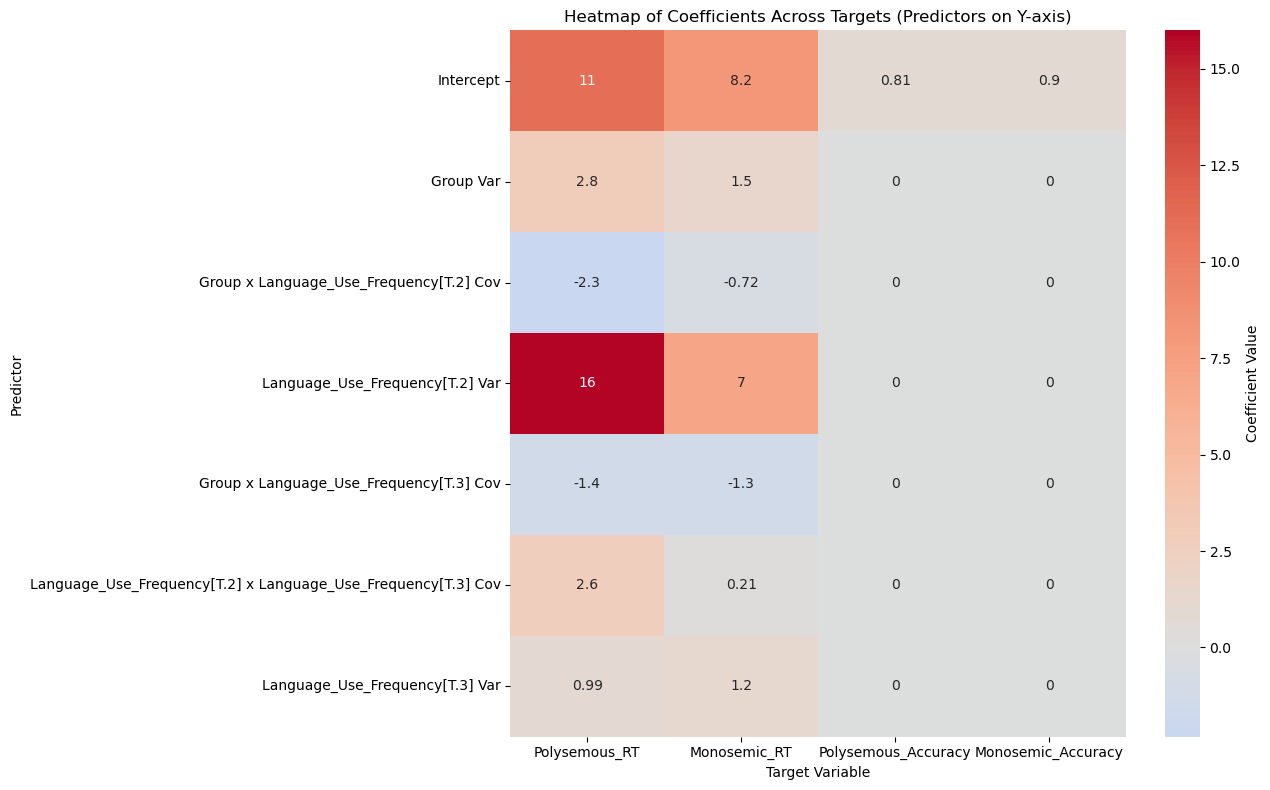

In [368]:
#Creating a heatmap representing the coefficients
data = np.array([
    [11, 8.2, 0.81, 0.9],
    [2.84, 1.5, 0, 0],
    [-2.31, -0.72, 0, 0],
    [16, 7, 0, 0],
    [-1.4, -1.34, 0, 0],
    [2.64, 0.21, 0, 0],
    [0.99, 1.25, 0, 0]
])

#Assigning the predictors and target variables
predictors = [
    "Intercept",
    "Group Var",
    "Group x Language_Use_Frequency[T.2] Cov",
    "Language_Use_Frequency[T.2] Var",
    "Group x Language_Use_Frequency[T.3] Cov",
    "Language_Use_Frequency[T.2] x Language_Use_Frequency[T.3] Cov",
    "Language_Use_Frequency[T.3] Var"
]
targets = ["Polysemous_RT", "Monosemic_RT", "Polysemous_Accuracy", "Monosemic_Accuracy"]

#Creating a DataFrame
heatmap_df = pd.DataFrame(data, index=predictors, columns=targets)

#Ploting the heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Coefficient Value'})
plt.title("Heatmap of Coefficients Across Targets (Predictors on Y-axis)")
plt.xlabel("Target Variable")
plt.ylabel("Predictor")
plt.tight_layout()
plt.show()


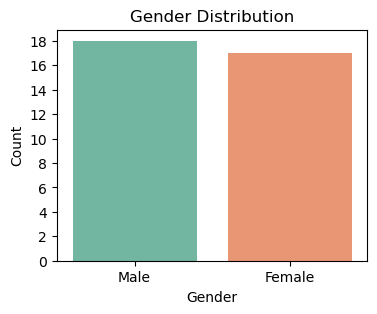

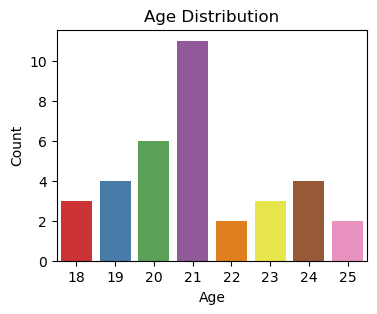

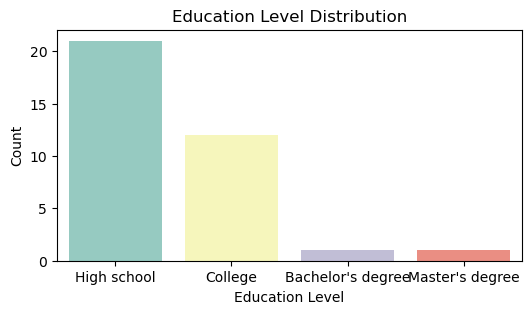

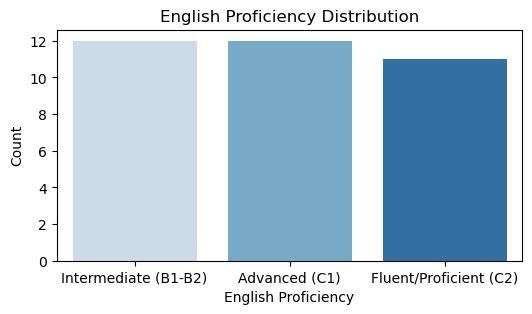

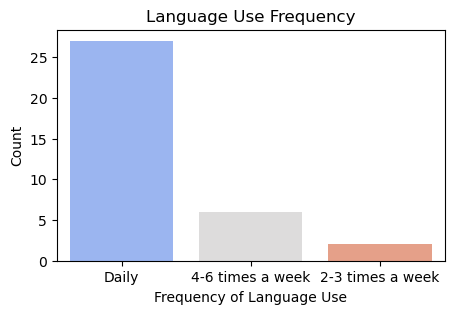

In [383]:
#Gender Distribution (Bar Plot)
plt.figure(figsize=(4,3))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

#Age Distribution (Bar Plot)
sorted_ages = sorted(data['Age'].unique())
plt.figure(figsize=(4,3))
sns.countplot(x='Age', data=data, palette='Set1', order=sorted_ages)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

#Education Level Distribution (Bar Plot)
plt.figure(figsize=(6,3))
sns.countplot(x='Education_Level', data=data, palette='Set3')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=["High school", "College", "Bachelor's degree", "Master's degree"])
plt.show()

#English Proficiency Distribution (Bar Plot)
plt.figure(figsize=(6,3))
sns.countplot(x='English_Proficiency', data=data, palette='Blues')
plt.title('English Proficiency Distribution')
plt.xlabel('English Proficiency')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Intermediate (B1-B2)', 'Advanced (C1)', 'Fluent/Proficient (C2)'])
plt.show()

#Language Use Frequency Distribution (Bar Plot)
plt.figure(figsize=(5,3))
sns.countplot(x='Language_Use_Frequency', data=data, palette='coolwarm')
plt.title('Language Use Frequency')
plt.xlabel('Frequency of Language Use')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Daily', '4-6 times a week', '2-3 times a week'])
plt.show()


## Heatmaps for individual independent variable results

## Education level

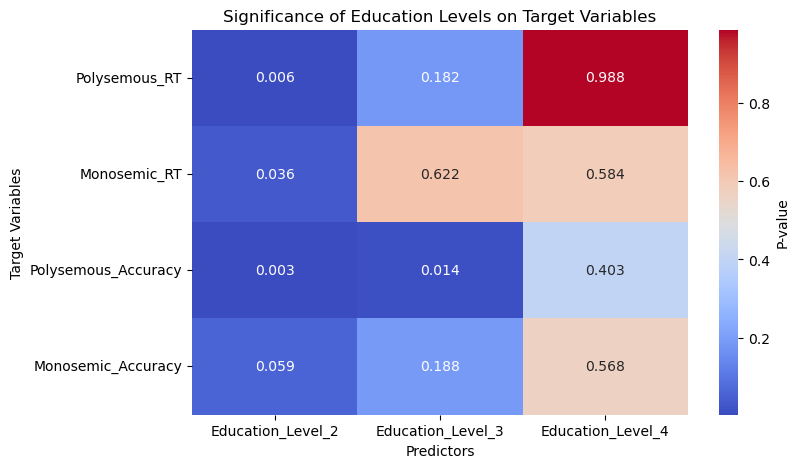

In [388]:
#Creating DataFrame with p-values
p_values = pd.DataFrame({
    "Polysemous_RT": [0.006, 0.182, 0.988],
    "Monosemic_RT": [0.036, 0.622, 0.584],
    "Polysemous_Accuracy": [0.003, 0.014, 0.403],
    "Monosemic_Accuracy": [0.059, 0.188, 0.568]
}, index=["Education_Level_2", "Education_Level_3", "Education_Level_4"])

#Transposing the DataFrame
p_values = p_values.T

#Creating Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'}, fmt=".3f")
plt.title("Significance of Education Levels on Target Variables")
plt.xlabel("Predictors")
plt.ylabel("Target Variables")
plt.show()

## English Proficiency

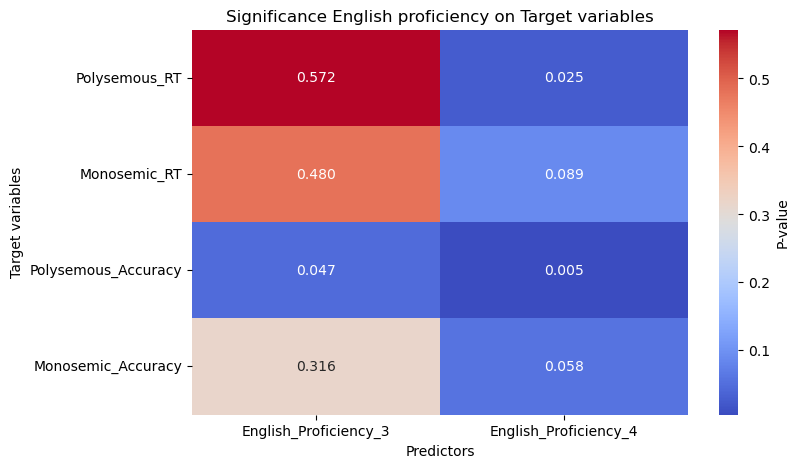

In [389]:
#Creating DataFrame with p-values
p_values = pd.DataFrame({
    "Polysemous_RT": [0.572, 0.025],
    "Monosemic_RT": [0.480, 0.089],
    "Polysemous_Accuracy": [0.047, 0.005],
    "Monosemic_Accuracy": [0.316, 0.058]
}, index=categories)

#Transposing the DataFrame
p_values = p_values.T

#Creating Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'}, fmt=".3f")
plt.title("Significance English proficiency on Target variables")
plt.xlabel("Predictors")
plt.ylabel("Target variables")
plt.show()


## Language Use Frequency

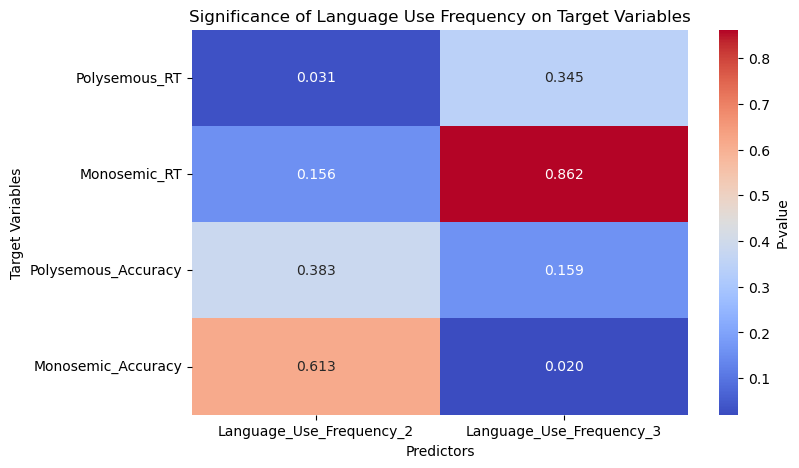

In [390]:
#Creating DataFrame with p-values
p_values = pd.DataFrame({
    "Polysemous_RT": [0.031, 0.345],
    "Monosemic_RT": [0.156, 0.862],
    "Polysemous_Accuracy": [0.383, 0.159],
    "Monosemic_Accuracy": [0.613, 0.020]
}, index=["Language_Use_Frequency_2", "Language_Use_Frequency_3"])

#Transposing the DataFrame
p_values = p_values.T

#Creating Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'}, fmt=".3f")
plt.title("Significance of Language Use Frequency on Target Variables")
plt.xlabel("Predictors")
plt.ylabel("Target Variables")
plt.show()

## Use Context

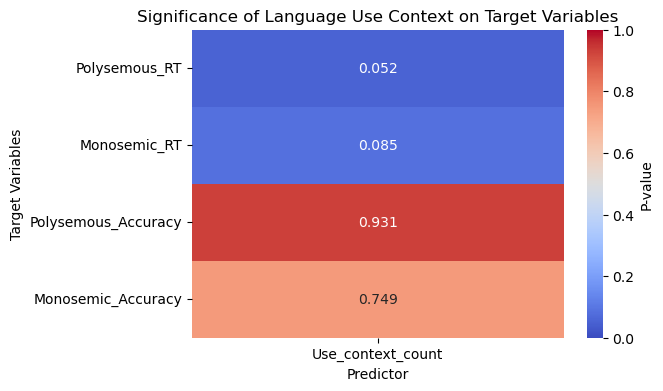

In [393]:
#Creating DataFrame with p-values
p_values = pd.DataFrame({
    "Polysemous_RT": [0.052],
    "Monosemic_RT": [0.085],
    "Polysemous_Accuracy": [0.931],
    "Monosemic_Accuracy": [0.749]
}, index=["Use_context_count"])

#Transposing the DataFrame
p_values = p_values.T

#Creating Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'}, fmt=".3f", vmin=0, vmax=1)
plt.title("Significance of Language Use Context on Target Variables")
plt.xlabel("Predictor")
plt.ylabel("Target Variables")
plt.show()